In [1039]:
import pandas as pd    #IMPORTING PYTHON LIBRARIES TO LOAD DATASET 
import numpy as np    
import matplotlib.pyplot as plt   #FOR VISUALIZATION OF DATASET 
import seaborn as sns #FOR VISUALIZATION OF DATASET
import sklearn.preprocessing as LabelEncoder   #LabelEncoder for feature engineering 
from scipy import stats
import plotly.express as px  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge , Lasso
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

AIR QUALITY DATASET WHICH 


In [993]:
df = pd.read_csv(r"C:\Users\mansi\Downloads\machine_learning_project\Air_Quality.csv")   #LOADING DATASET USING PANDAS 
df.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,NaN


In [994]:
df.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [995]:
df['Message']  # it does not contain any  value , it is just a random column  which need to be dropped


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
18857   NaN
18858   NaN
18859   NaN
18860   NaN
18861   NaN
Name: Message, Length: 18862, dtype: float64

In [996]:
data = df.drop(columns= ['Message'])
data


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00
...,...,...,...,...,...,...,...,...,...,...,...
18857,165993,375,Nitrogen dioxide (NO2),Mean,ppb,CD,207,Kingsbridge Heights and Bedford (CD7),Winter 2012-13,12/01/2012,25.78
18858,338255,386,Ozone (O3),Mean,ppb,CD,107,Upper West Side (CD7),Summer 2015,06/01/2015,28.13
18859,651029,386,Ozone (O3),Mean,ppb,CD,307,Sunset Park (CD7),Summer 2019,06/01/2019,28.78
18860,667628,375,Nitrogen dioxide (NO2),Mean,ppb,CD,207,Kingsbridge Heights and Bedford (CD7),Winter 2019-20,12/01/2019,23.68


IT IS INFORMATION OF NEW YORK CITY , IT CONTAIN NAME OF POLLUTION AND GEOGRAPHIC TYPE NAME OF PLACE , HOW TO MEASURE THIS , GEO JOIN ID (IDK), GEO PLACE NAME IS SPECIFIC NAME OF THE PLACE GICEN , TIME PERIOD IS GIVEN AND START DATE ALONG WITH DATA VALUE OF AIR 


In [997]:
data = data.drop(columns=['Unique ID'])

In [998]:
data.duplicated().sum()    #THERE IS NO DUPLOCATED VALUE IN THIS DATASET

0

In [999]:
data.isnull().sum()   #THERE IS NO NULL VALUE 

Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [1000]:
date_from_date = pd.to_datetime(data['Start_Date'] , dayfirst= True, errors='coerce')   #EXTRACTING MONTH, YEAR AND DAY FROM DATE COLUMN 
year_from_date = pd.to_datetime(data['Start_Date'] , dayfirst= True , errors='coerce')
month_from_date = pd.to_datetime(data['Start_Date'] , dayfirst=True , errors='coerce')
data['date']  = date_from_date.dt.day.fillna(0).astype(int)   #FILLING THE NAn VALUE AND GETTING INT VALUE AS EXTRACTED 
data['year']  = year_from_date.dt.year.fillna(0).astype(int)
data['month'] = month_from_date.dt.month.fillna(0).astype(int)

In [1001]:
data[['year','date','month']]

,year,date,month
0,2014,12,1
1,2014,12,1
2,2017,1,1
3,2015,12,1
4,2016,6,1
...,...,...,...
18857,2012,12,1
18858,2015,6,1
18859,2019,6,1
18860,2019,12,1


In [1002]:
data = data.drop(columns = ['Start_Date'])

In [1003]:
data['season'] = data['Time Period'].str.extract(r'(Winter|Annual Average|Summer)' , expand  =False)
data = data.drop(columns = 'Time Period')

In [1004]:
data = data.drop(columns= ['Geo Place Name','Measure' , 'Measure Info'] , axis  = 1)

In [1005]:
data['season'] = data['season'].map({'Winter': 1 , 'Annual Average': 2, 'Summer': 3})  #ASSIGNING NUMERICAL CATEGORICAL VALUES TO SEASON 

In [1006]:
data['season']

0        1.0
1        1.0
2        2.0
3        1.0
4        3.0
        ... 
18857    1.0
18858    3.0
18859    3.0
18860    1.0
18861    2.0
Name: season, Length: 18862, dtype: float64

In [1007]:
tt ={
    'CD': 0,
    'UHF42' : 1 ,
    'UHF34': 2, 
    'Borough' : 3,
    'Citywide': 4
}

data['Geo Type Name'] = data['Geo Type Name'].map(tt)

In [1008]:
data = pd.get_dummies(data, columns = ['Name'], dtype = int)

OUTLIER DETECTION 


<Axes: xlabel='Data Value'>

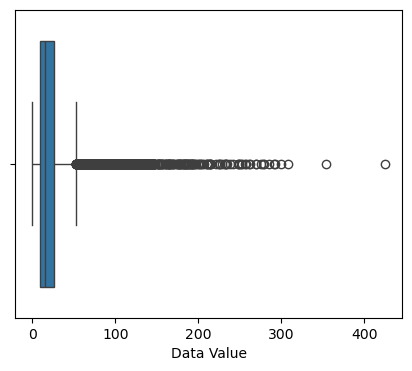

In [1009]:
plt.figure(figsize =(5,4))
sns.boxplot( x = data['Data Value'])


In [1010]:
Q1  = data['Data Value'].quantile(0.25)
Q3 = data['Data Value'].quantile(0.75)
IQR = Q3 -Q1
lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5* IQR
data = data[(data['Data Value'] >= lower_bound) & (data['Data Value'] <= Upper_bound)]
data

,Indicator ID,Geo Type Name,Geo Join ID,Data Value,date,year,month,season,Name_Annual vehicle miles traveled,Name_Annual vehicle miles traveled (cars),...,Name_Boiler Emissions- Total SO2 Emissions,Name_Cardiac and respiratory deaths due to Ozone,Name_Cardiovascular hospitalizations due to PM2.5 (age 40+),Name_Deaths due to PM2.5,Name_Fine particles (PM 2.5),Name_Nitrogen dioxide (NO2),Name_Outdoor Air Toxics - Benzene,Name_Outdoor Air Toxics - Formaldehyde,Name_Ozone (O3),Name_Respiratory hospitalizations due to PM2.5 (age 20+)
0,375,0,407,23.97,12,2014,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,375,0,107,27.42,12,2014,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,375,0,414,12.55,1,2017,1,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,375,0,407,22.63,12,2015,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,375,0,407,14.00,6,2016,1,3.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18857,375,0,207,25.78,12,2012,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
18858,386,0,107,28.13,6,2015,1,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
18859,386,0,307,28.78,6,2019,1,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
18860,375,0,207,23.68,12,2019,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


<Axes: xlabel='Data Value'>

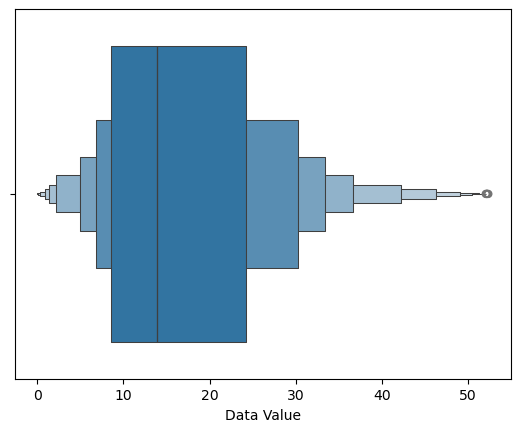

In [1011]:
sns.boxenplot(x = data['Data Value'])

In [1012]:
data.describe()

,Indicator ID,Geo Type Name,Geo Join ID,Data Value,date,year,month,season,Name_Annual vehicle miles traveled,Name_Annual vehicle miles traveled (cars),...,Name_Boiler Emissions- Total SO2 Emissions,Name_Cardiac and respiratory deaths due to Ozone,Name_Cardiovascular hospitalizations due to PM2.5 (age 40+),Name_Deaths due to PM2.5,Name_Fine particles (PM 2.5),Name_Nitrogen dioxide (NO2),Name_Outdoor Air Toxics - Benzene,Name_Outdoor Air Toxics - Formaldehyde,Name_Ozone (O3),Name_Respiratory hospitalizations due to PM2.5 (age 20+)
count,17872.000000,17872.000000,1.787200e+04,17872.000000,17872.000000,17872.000000,17872.000000,14805.000000,17872.000000,17872.000000,...,17872.000000,17872.000000,17872.000000,17872.000000,17872.000000,17872.000000,17872.000000,17872.000000,17872.000000,17872.000000
mean,419.865936,0.946285,6.314570e+05,16.720212,6.404264,1983.119628,1.005260,2.142857,0.005483,0.006267,...,0.005148,0.013429,0.013429,0.009904,0.355025,0.355025,0.011359,0.011359,0.118342,0.013429
std,104.782598,0.908322,8.032095e+06,10.183420,4.447533,251.147084,0.191812,0.833021,0.073849,0.078917,...,0.071565,0.115105,0.115105,0.099026,0.478534,0.478534,0.105972,0.105972,0.323021,0.115105
min,365.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.000000,0.000000,2.020000e+02,8.560000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,375.000000,1.000000,3.030000e+02,13.840002,6.000000,2015.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,386.000000,2.000000,4.040000e+02,24.272500,12.000000,2019.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,661.000000,4.000000,1.051061e+08,52.381241,12.000000,2023.000000,2.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1013]:
data.dropna()   

,Indicator ID,Geo Type Name,Geo Join ID,Data Value,date,year,month,season,Name_Annual vehicle miles traveled,Name_Annual vehicle miles traveled (cars),...,Name_Boiler Emissions- Total SO2 Emissions,Name_Cardiac and respiratory deaths due to Ozone,Name_Cardiovascular hospitalizations due to PM2.5 (age 40+),Name_Deaths due to PM2.5,Name_Fine particles (PM 2.5),Name_Nitrogen dioxide (NO2),Name_Outdoor Air Toxics - Benzene,Name_Outdoor Air Toxics - Formaldehyde,Name_Ozone (O3),Name_Respiratory hospitalizations due to PM2.5 (age 20+)
0,375,0,407,23.97,12,2014,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,375,0,107,27.42,12,2014,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,375,0,414,12.55,1,2017,1,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,375,0,407,22.63,12,2015,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,375,0,407,14.00,6,2016,1,3.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18857,375,0,207,25.78,12,2012,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
18858,386,0,107,28.13,6,2015,1,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
18859,386,0,307,28.78,6,2019,1,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
18860,375,0,207,23.68,12,2019,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


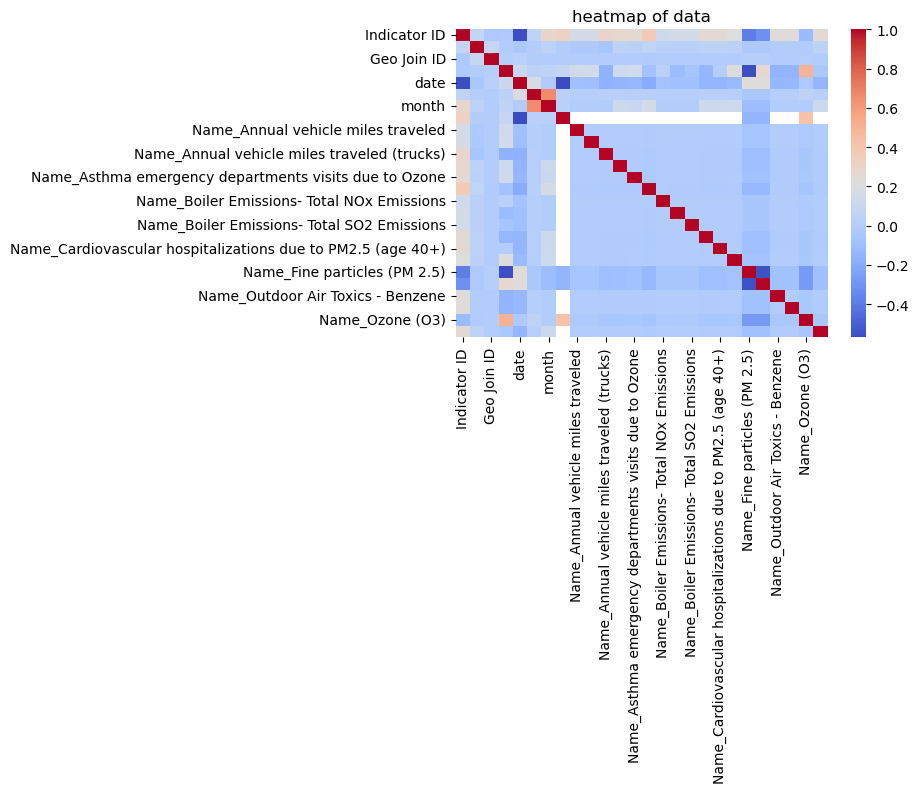

In [1014]:
plt.figure(figsize = (6,4))
sns.heatmap(data.corr(), cmap = 'coolwarm')
plt.title("heatmap of data")
plt.show()

MODEL 1 - LINEAR REGRESSION ON MAIN 'DATA VALUE' AS TARGET COLUMN, WITH RESPECT TO LOCATION , TIME PERIOD , NAME OF POLLUTION. 

In [1015]:
data.isnull().sum()

Indicator ID                                                      0
Geo Type Name                                                     0
Geo Join ID                                                       0
Data Value                                                        0
date                                                              0
year                                                              0
month                                                             0
season                                                         3067
Name_Annual vehicle miles traveled                                0
Name_Annual vehicle miles traveled (cars)                         0
Name_Annual vehicle miles traveled (trucks)                       0
Name_Asthma emergency department visits due to PM2.5              0
Name_Asthma emergency departments visits due to Ozone             0
Name_Asthma hospitalizations due to Ozone                         0
Name_Boiler Emissions- Total NOx Emissions      

In [1016]:
# REMOVING NULL VALUE TO PREDICT BETTER 
data['season'] = data['season'].fillna(data['season'].mode()[0])

In [1017]:
data = data.dropna()

In [1018]:
X = data.drop(['Data Value','Indicator ID','Geo Join ID','date'], axis = 1)
y = data['Data Value']

In [1019]:
X_train,X_test,y_train,y_test  = train_test_split(X ,y, test_size=0.2 ,random_state=42)

In [1020]:
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(X_train) 
scaled_x_test = scaler.transform(X_test)


In [1021]:
model  = LinearRegression()
model.fit(scaled_x_train, y_train)

LinearRegression()

In [1022]:
y_pred = model.predict(scaled_x_test)
mse = mean_squared_error(y_test, y_pred)
print("mean square error in linear regression", mse)
score = r2_score(y_test , y_pred)
print("r2 score in linear regression: ", score)

mean square error in linear regression 26.250812379905263
r2 score in linear regression:  0.7435001081910071


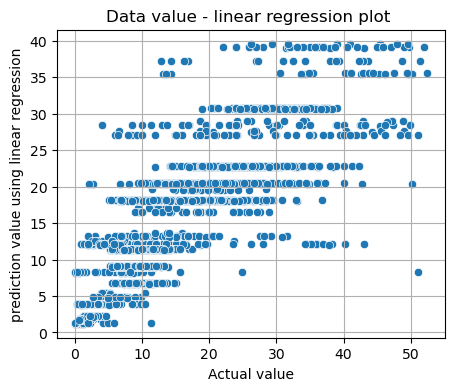

In [1023]:
plt.figure(figsize = (5,4))
sns.scatterplot(x =y_test , y =  y_pred  )
plt.title("Data value - linear regression plot ")
plt.xlabel("Actual value")
plt.ylabel("prediction value using linear regression")
plt.grid(True)
plt.show()

In [1024]:
las = Lasso(alpha =0.5)
las.fit(scaled_x_train , y_train)
y_pred_lasss = las.predict(scaled_x_test)
r2_score_lasso = r2_score(y_test , y_pred_lasss)
mse_lasso = mean_squared_error(y_test , y_pred_lasss)
print("r2 score using lasso regression:" , r2_score_lasso)
print(" mean square error using lasso regression:" , mse_lasso)


r2 score using lasso regression: 0.7036662471422448
 mean square error using lasso regression: 30.327504987389688


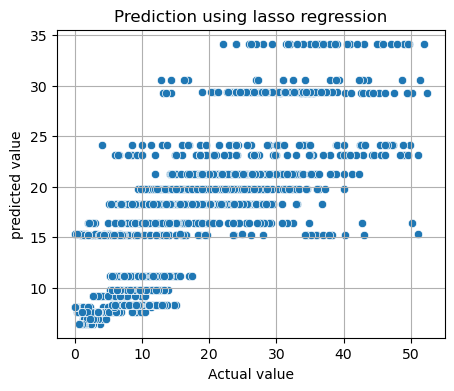

In [1025]:
plt.figure(figsize = (5,4))
sns.scatterplot(x = y_test , y = y_pred_lasss)
plt.title("Prediction using lasso regression")
plt.xlabel("Actual value")
plt.ylabel("predicted value")
plt.grid(True)
plt.show()

In [1026]:
rid = Ridge(alpha = 0.5)
rid.fit(scaled_x_train , y_train)
y_pred_rig = rid.predict(scaled_x_test)
mse_rid = mean_squared_error(y_test, y_pred_rig)
print("mse using ridge regression: ",mse_rid)
r2_lasso = r2_score(y_test, y_pred_rig)
print("r2 score using ridge regression: ", r2_lasso)

mse using ridge regression:  26.250811526774612
r2 score using ridge regression:  0.7435001165270507


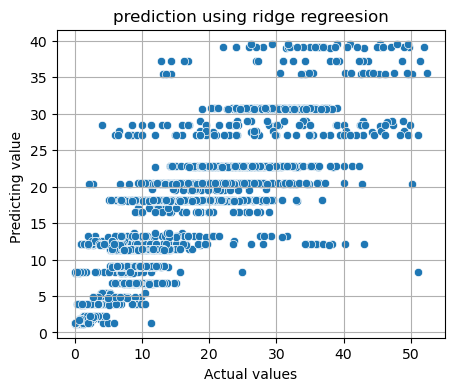

In [1027]:
plt.figure(figsize = (5,4))
sns.scatterplot(x = y_test , y = y_pred_rig)
plt.title("prediction using ridge regreesion")
plt.xlabel("Actual values")
plt.ylabel("Predicting value ")
plt.grid(True)
plt.show()

RANDOM FOREST REGREESION MODEL 

In [1028]:
random_ff = RandomForestRegressor()
rand_pred = random_ff.fit(scaled_x_train , y_train )
random_fore_pred = random_ff.predict(scaled_x_test)
r2_froest_value = r2_score(y_test , random_fore_pred)
print("r2 score in random forest:" , r2_froest_value)
mse_forest_value = mean_squared_error(y_test , random_fore_pred)
print("mse for random forest :" , mse_forest_value)

r2 score in random forest: 0.8046818935774944
mse for random forest : 19.989322139416984


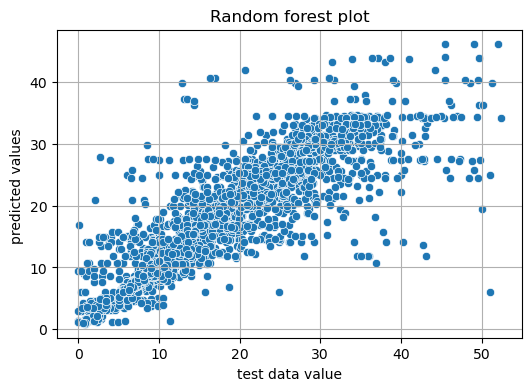

In [1029]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = y_test , y = random_fore_pred)
plt.title("Random forest plot")
plt.xlabel("test data value")
plt.ylabel("predicted values ")
plt.grid(True)
plt.show()

RESIDUAL

Text(0.5, 1.0, 'residuals')

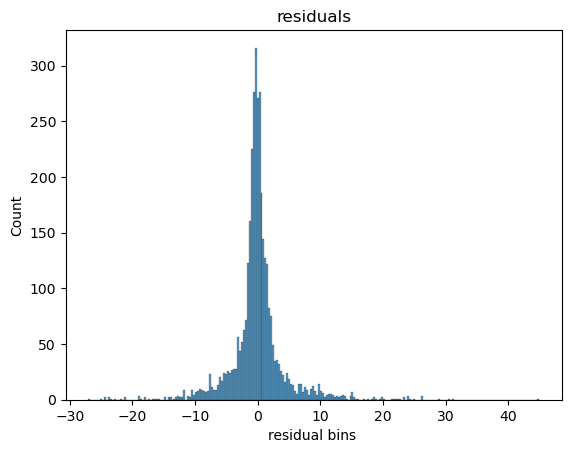

In [1030]:
residuals = y_test - random_fore_pred
sns.histplot(residuals)
plt.xlabel("residual bins ")
plt.title("residuals")

MODEL -2 K-MEAN CLUSTER TO UNDERSTAND PATTERN OF AIR POLLUTION DATASET

In [1037]:
feature = [col for col in data.columns if 'Name_' in col]
feature.append('Data Value')
cluster_data_set = data[feature]
scaler  = StandardScaler()
model = scaler.fit(cluster_data_set)
Kmeans = KMeans(n_clusters= 3 , random_state=42)
data['cluster'] = Kmeans.fit_predict(cluster_data_set)

In [1038]:
cluster_summary = data.groupby('cluster')['Data Value'].mean().reset_index()
print("Average Pollution Level per Cluster:")
print(cluster_summary)


Average Pollution Level per Cluster:
   cluster  Data Value
0        0   32.480193
1        1   20.095772
2        2    8.480852


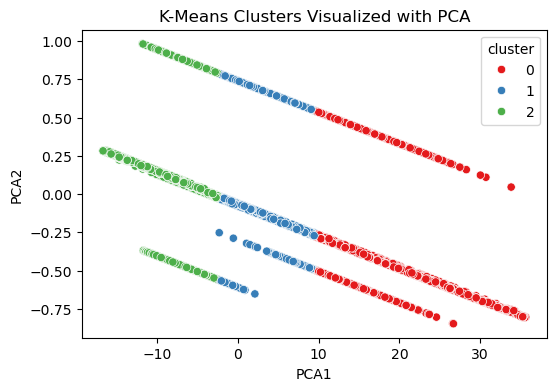

In [1045]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cluster_data_set)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]


plt.figure(figsize=(6,4))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data, palette='Set1')
plt.title("K-Means Clusters Visualized with PCA")
plt.show()